In [1]:
# this script is the equivalent to the r script that processes the CA storie data, 
# but since that script makes problematic files I decided to translate it to python. 

# This script uses the CA storie index data obtained from 
# Campbell, Steve - FPAC-NRCS, Portland, OR <steve.campbell@usda.gov>
# and processes it to get a consistent 70m storie index raster over CA

# Anna Boser Dec 29, 2021

In [2]:
from pyprojroot import here
import rasterio
import datetime
import numpy as np
import pandas as pd
from osgeo import gdal, gdalconst
import matplotlib.pyplot as plt

In [3]:
# my grid and map of california
# CA_grid <- raster(here("data", "intermediate", "CA_grid.tif"))
# CA <- st_read(here("data", "raw", "shapefiles", "california", "california.shp")) %>% st_transform(st_crs(CA_grid))

CA_grid = gdal.Open(str(here("./data/intermediate/CA_grid.tif")))
CA_grid = CA_grid.ReadAsArray()
print(CA_grid.shape)

(15017, 16289)


In [4]:
# the grid that the values in the CSV correspond to
# gNATSGO_grid <- raster(here("data", "raw", "CA_storie", "CA_gNATSGO_MuRaster_tif", "MapunitRaster_10m.tif"))
# gNATSGO_grid_crop <- crop(gNATSGO_grid,  st_transform(CA, st_crs(gNATSGO_grid)))

gNATSGO_grid = gdal.Open(str(here("./data/raw/CA_storie/CA_gNATSGO_MuRaster_tif/MapunitRaster_10m.tif")))
gNATSGO_grid = gNATSGO_grid.ReadAsArray()
print(gNATSGO_grid.shape)

(124530, 75948)


In [7]:
# the storie index
# storie <- read.csv(here("data", "raw", "CA_storie", "CA_all_NASIS_Storie_Index_SSURGO_STATSGO2.csv"))

storie = pd.read_csv(str(here("./data/raw/CA_storie/CA_all_NASIS_Storie_Index_SSURGO_STATSGO2.csv")))

/opt/anaconda3/envs/bplayground/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (8,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
# soil data are organized in a strange way where there are unique map units
# that are associated with a location (and thus can be mapped using the gNATSGO grid).
# However, there are often multiple components within one map unit but their location
# is unknown. Therefore, to get an average value of soil quality for each map key, 
# I need to average the storie index accross components, weighting each one by prevalence. 

# storie <- storie %>% 
#   group_by(mukey) %>%
#   summarise(storie = stats::weighted.mean(Storie_Index_rev, comppct_r, na.rm = TRUE))

In [9]:
gNATSGO_storie = gdal.Open(str(here("./data/intermediate/CA_storie/gNATSGO_storie.tif")))
gNATSGO_storie = gNATSGO_storie.ReadAsArray()
print(gNATSGO_storie.shape)

(121036, 70946)


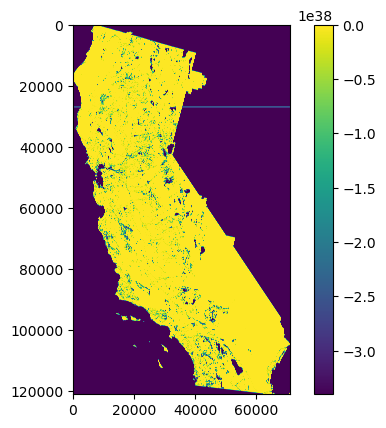

In [10]:
plt.figure()
plt.imshow(gNATSGO_storie)
plt.colorbar()
plt.show()

In [17]:
# Source
src_filename = str(here("./data/intermediate/CA_storie/gNATSGO_storie.tif"))
src = gdal.Open(src_filename, gdalconst.GA_ReadOnly)
src_proj = src.GetProjection()
src_geotrans = src.GetGeoTransform()

# We want a section of source that matches this:
match_filename = str(here("./data/intermediate/CA_grid.tif"))
match_ds = gdal.Open(match_filename, gdalconst.GA_ReadOnly)
match_proj = match_ds.GetProjection()
match_geotrans = match_ds.GetGeoTransform()
wide = match_ds.RasterXSize
high = match_ds.RasterYSize

# Output / destination
dst_filename = str(here("./data/intermediate/CA_storie/CA_storie.tif"))
dst = gdal.GetDriverByName('GTiff').Create(dst_filename, wide, high, 1, gdalconst.GDT_Float32)
dst.SetGeoTransform(match_geotrans)
dst.SetProjection(match_proj)

# Do the work
gdal.ReprojectImage(src, dst, src_proj, match_proj, gdalconst.GRA_Bilinear)

del dst # Flush

/opt/anaconda3/envs/bplayground/lib/python3.8/site-packages/pyprojroot/pyprojroot.py:51: UserWarning: Path doesn't exist: /Users/annaboser/Documents/GitHub/ET_agriculture/data/intermediate/CA_storie/CA_storie.tif
  warnings.warn("Path doesn't exist: {}".format(path))


In [12]:
src = gdal.Open(src_filename, gdalconst.GA_ReadOnly)

In [13]:
src

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f7ee000b5d0> >

In [14]:
src_proj = src.GetProjection()

In [15]:
match_filename = str(here("./data/intermediate/CA_grid.tif"))
match_ds = gdal.Open(match_filename, gdalconst.GA_ReadOnly)
match_proj = match_ds.GetProjection()
match_geotrans = match_ds.GetGeoTransform()
wide = match_ds.RasterXSize
high = match_ds.RasterYSize

In [16]:
wide

16289

In [ ]:
dst

NameError: name 'dst' is not defined